# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

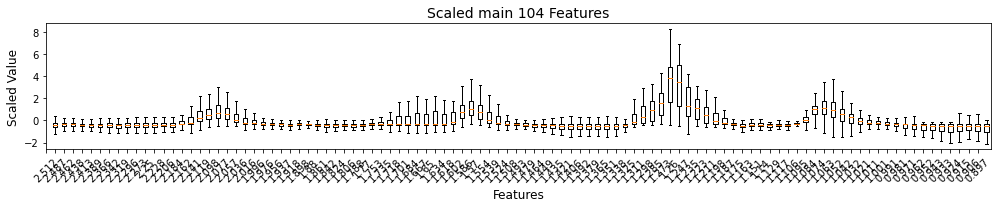

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

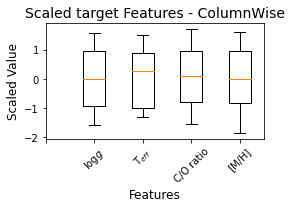

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

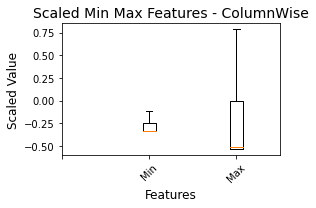

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:33 - loss: 1.8612 - gravity_loss: 0.4617 - c_o_ratio_loss: 0.4754 - metallicity_loss: 0.4675 - temperature_loss: 0.4565 - gravity_mae: 0.8639 - c_o_ratio_mae: 0.8979 - metallicity_mae: 0.8648 - temperature_mae: 0.8601

 2/13 [===>..........................] - ETA: 43s - loss: 1.8351 - gravity_loss: 0.4660 - c_o_ratio_loss: 0.4596 - metallicity_loss: 0.4604 - temperature_loss: 0.4491 - gravity_mae: 0.8707 - c_o_ratio_mae: 0.8787 - metallicity_mae: 0.8568 - temperature_mae: 0.8506 

 3/13 [=====>........................] - ETA: 40s - loss: 1.8108 - gravity_loss: 0.4664 - c_o_ratio_loss: 0.4604 - metallicity_loss: 0.4525 - temperature_loss: 0.4316 - gravity_mae: 0.8717 - c_o_ratio_mae: 0.8804 - metallicity_mae: 0.8462 - temperature_mae: 0.8290

 4/13 [========>.....................] - ETA: 37s - loss: 1.7688 - gravity_loss: 0.4631 - c_o_ratio_loss: 0.4624 - metallicity_loss: 0.4421 - temperature_loss: 0.4012 - gravity_mae: 0.8674 - c_o_ratio_mae: 0.8813 - metallicity_mae: 0.8342 - temperature_mae: 0.7899

 5/13 [==========>...................] - ETA: 32s - loss: 1.7046 - gravity_loss: 0.4583 - c_o_ratio_loss: 0.4607 - metallicity_loss: 0.4333 - temperature_loss: 0.3523 - gravity_mae: 0.8618 - c_o_ratio_mae: 0.8782 - metallicity_mae: 0.8242 - temperature_mae: 0.7227

 6/13 [============>.................] - ETA: 28s - loss: 1.6305 - gravity_loss: 0.4544 - c_o_ratio_loss: 0.4569 - metallicity_loss: 0.4150 - temperature_loss: 0.3042 - gravity_mae: 0.8571 - c_o_ratio_mae: 0.8723 - metallicity_mae: 0.8024 - temperature_mae: 0.6506

 7/13 [===============>..............] - ETA: 24s - loss: 1.5792 - gravity_loss: 0.4489 - c_o_ratio_loss: 0.4549 - metallicity_loss: 0.3929 - temperature_loss: 0.2826 - gravity_mae: 0.8508 - c_o_ratio_mae: 0.8680 - metallicity_mae: 0.7738 - temperature_mae: 0.6215

 8/13 [=================>............] - ETA: 20s - loss: 1.5957 - gravity_loss: 0.4449 - c_o_ratio_loss: 0.4529 - metallicity_loss: 0.3747 - temperature_loss: 0.3233 - gravity_mae: 0.8455 - c_o_ratio_mae: 0.8645 - metallicity_mae: 0.7504 - temperature_mae: 0.6774

 9/13 [===================>..........] - ETA: 16s - loss: 1.5458 - gravity_loss: 0.4386 - c_o_ratio_loss: 0.4505 - metallicity_loss: 0.3612 - temperature_loss: 0.2955 - gravity_mae: 0.8376 - c_o_ratio_mae: 0.8618 - metallicity_mae: 0.7325 - temperature_mae: 0.6374

10/13 [======================>.......] - ETA: 12s - loss: 1.5264 - gravity_loss: 0.4363 - c_o_ratio_loss: 0.4474 - metallicity_loss: 0.3496 - temperature_loss: 0.2932 - gravity_mae: 0.8349 - c_o_ratio_mae: 0.8585 - metallicity_mae: 0.7176 - temperature_mae: 0.6403

11/13 [========================>.....] - ETA: 8s - loss: 1.4967 - gravity_loss: 0.4324 - c_o_ratio_loss: 0.4448 - metallicity_loss: 0.3398 - temperature_loss: 0.2797 - gravity_mae: 0.8300 - c_o_ratio_mae: 0.8559 - metallicity_mae: 0.7046 - temperature_mae: 0.6235 

12/13 [==========================>...] - ETA: 4s - loss: 1.4635 - gravity_loss: 0.4267 - c_o_ratio_loss: 0.4410 - metallicity_loss: 0.3297 - temperature_loss: 0.2661 - gravity_mae: 0.8226 - c_o_ratio_mae: 0.8515 - metallicity_mae: 0.6913 - temperature_mae: 0.6052

13/13 [==============================] - ETA: 0s - loss: 1.4581 - gravity_loss: 0.4254 - c_o_ratio_loss: 0.4403 - metallicity_loss: 0.3280 - temperature_loss: 0.2643 - gravity_mae: 0.8212 - c_o_ratio_mae: 0.8508 - metallicity_mae: 0.6890 - temperature_mae: 0.6030

13/13 [==============================] - 58s 4s/step - loss: 1.4581 - gravity_loss: 0.4254 - c_o_ratio_loss: 0.4403 - metallicity_loss: 0.3280 - temperature_loss: 0.2643 - gravity_mae: 0.8212 - c_o_ratio_mae: 0.8508 - metallicity_mae: 0.6890 - temperature_mae: 0.6030 - val_loss: 1.0999 - val_gravity_loss: 0.3601 - val_c_o_ratio_loss: 0.3748 - val_metallicity_loss: 0.2011 - val_temperature_loss: 0.1639 - val_gravity_mae: 0.7416 - val_c_o_ratio_mae: 0.7758 - val_metallicity_mae: 0.5174 - val_temperature_mae: 0.4770


Epoch 2/4


 1/13 [=>............................] - ETA: 48s - loss: 1.1548 - gravity_loss: 0.3757 - c_o_ratio_loss: 0.3887 - metallicity_loss: 0.2129 - temperature_loss: 0.1775 - gravity_mae: 0.7604 - c_o_ratio_mae: 0.7943 - metallicity_mae: 0.5405 - temperature_mae: 0.4917

 2/13 [===>..........................] - ETA: 47s - loss: 1.1357 - gravity_loss: 0.3746 - c_o_ratio_loss: 0.3778 - metallicity_loss: 0.2079 - temperature_loss: 0.1754 - gravity_mae: 0.7600 - c_o_ratio_mae: 0.7783 - metallicity_mae: 0.5328 - temperature_mae: 0.4930

 3/13 [=====>........................] - ETA: 42s - loss: 1.1022 - gravity_loss: 0.3734 - c_o_ratio_loss: 0.3709 - metallicity_loss: 0.2014 - temperature_loss: 0.1565 - gravity_mae: 0.7590 - c_o_ratio_mae: 0.7690 - metallicity_mae: 0.5234 - temperature_mae: 0.4628

 4/13 [========>.....................] - ETA: 37s - loss: 1.0599 - gravity_loss: 0.3665 - c_o_ratio_loss: 0.3598 - metallicity_loss: 0.2009 - temperature_loss: 0.1326 - gravity_mae: 0.7482 - c_o_ratio_mae: 0.7538 - metallicity_mae: 0.5210 - temperature_mae: 0.4155

 5/13 [==========>...................] - ETA: 34s - loss: 1.0296 - gravity_loss: 0.3636 - c_o_ratio_loss: 0.3478 - metallicity_loss: 0.2007 - temperature_loss: 0.1175 - gravity_mae: 0.7434 - c_o_ratio_mae: 0.7372 - metallicity_mae: 0.5198 - temperature_mae: 0.3855

 6/13 [============>.................] - ETA: 31s - loss: 1.0074 - gravity_loss: 0.3623 - c_o_ratio_loss: 0.3345 - metallicity_loss: 0.1998 - temperature_loss: 0.1109 - gravity_mae: 0.7400 - c_o_ratio_mae: 0.7173 - metallicity_mae: 0.5182 - temperature_mae: 0.3760

 7/13 [===============>..............] - ETA: 28s - loss: 0.9872 - gravity_loss: 0.3617 - c_o_ratio_loss: 0.3213 - metallicity_loss: 0.1995 - temperature_loss: 0.1048 - gravity_mae: 0.7383 - c_o_ratio_mae: 0.6965 - metallicity_mae: 0.5178 - temperature_mae: 0.3650

 8/13 [=================>............] - ETA: 23s - loss: 0.9659 - gravity_loss: 0.3588 - c_o_ratio_loss: 0.3118 - metallicity_loss: 0.1988 - temperature_loss: 0.0964 - gravity_mae: 0.7334 - c_o_ratio_mae: 0.6820 - metallicity_mae: 0.5165 - temperature_mae: 0.3468

 9/13 [===================>..........] - ETA: 19s - loss: 0.9499 - gravity_loss: 0.3561 - c_o_ratio_loss: 0.3044 - metallicity_loss: 0.1984 - temperature_loss: 0.0910 - gravity_mae: 0.7297 - c_o_ratio_mae: 0.6711 - metallicity_mae: 0.5159 - temperature_mae: 0.3355

10/13 [======================>.......] - ETA: 14s - loss: 0.9385 - gravity_loss: 0.3535 - c_o_ratio_loss: 0.2981 - metallicity_loss: 0.1982 - temperature_loss: 0.0887 - gravity_mae: 0.7262 - c_o_ratio_mae: 0.6624 - metallicity_mae: 0.5161 - temperature_mae: 0.3321

11/13 [========================>.....] - ETA: 9s - loss: 0.9233 - gravity_loss: 0.3508 - c_o_ratio_loss: 0.2908 - metallicity_loss: 0.1969 - temperature_loss: 0.0847 - gravity_mae: 0.7226 - c_o_ratio_mae: 0.6516 - metallicity_mae: 0.5147 - temperature_mae: 0.3237 

12/13 [==========================>...] - ETA: 4s - loss: 0.9086 - gravity_loss: 0.3489 - c_o_ratio_loss: 0.2837 - metallicity_loss: 0.1964 - temperature_loss: 0.0796 - gravity_mae: 0.7198 - c_o_ratio_mae: 0.6403 - metallicity_mae: 0.5136 - temperature_mae: 0.3108

13/13 [==============================] - ETA: 0s - loss: 0.9062 - gravity_loss: 0.3485 - c_o_ratio_loss: 0.2822 - metallicity_loss: 0.1965 - temperature_loss: 0.0789 - gravity_mae: 0.7193 - c_o_ratio_mae: 0.6379 - metallicity_mae: 0.5137 - temperature_mae: 0.3092

13/13 [==============================] - 61s 5s/step - loss: 0.9062 - gravity_loss: 0.3485 - c_o_ratio_loss: 0.2822 - metallicity_loss: 0.1965 - temperature_loss: 0.0789 - gravity_mae: 0.7193 - c_o_ratio_mae: 0.6379 - metallicity_mae: 0.5137 - temperature_mae: 0.3092 - val_loss: 0.7070 - val_gravity_loss: 0.3053 - val_c_o_ratio_loss: 0.1769 - val_metallicity_loss: 0.1782 - val_temperature_loss: 0.0466 - val_gravity_mae: 0.6610 - val_c_o_ratio_mae: 0.4699 - val_metallicity_mae: 0.4853 - val_temperature_mae: 0.2479


Epoch 3/4


 1/13 [=>............................] - ETA: 59s - loss: 0.7645 - gravity_loss: 0.3331 - c_o_ratio_loss: 0.1900 - metallicity_loss: 0.1900 - temperature_loss: 0.0514 - gravity_mae: 0.6981 - c_o_ratio_mae: 0.4976 - metallicity_mae: 0.5066 - temperature_mae: 0.2603

 2/13 [===>..........................] - ETA: 56s - loss: 0.7415 - gravity_loss: 0.3194 - c_o_ratio_loss: 0.1848 - metallicity_loss: 0.1871 - temperature_loss: 0.0502 - gravity_mae: 0.6806 - c_o_ratio_mae: 0.4917 - metallicity_mae: 0.5034 - temperature_mae: 0.2552

 3/13 [=====>........................] - ETA: 56s - loss: 0.7213 - gravity_loss: 0.3137 - c_o_ratio_loss: 0.1826 - metallicity_loss: 0.1803 - temperature_loss: 0.0446 - gravity_mae: 0.6734 - c_o_ratio_mae: 0.4889 - metallicity_mae: 0.4917 - temperature_mae: 0.2353

 4/13 [========>.....................] - ETA: 53s - loss: 0.7168 - gravity_loss: 0.3164 - c_o_ratio_loss: 0.1776 - metallicity_loss: 0.1817 - temperature_loss: 0.0411 - gravity_mae: 0.6748 - c_o_ratio_mae: 0.4813 - metallicity_mae: 0.4917 - temperature_mae: 0.2238

 5/13 [==========>...................] - ETA: 48s - loss: 0.7029 - gravity_loss: 0.3136 - c_o_ratio_loss: 0.1704 - metallicity_loss: 0.1790 - temperature_loss: 0.0399 - gravity_mae: 0.6713 - c_o_ratio_mae: 0.4683 - metallicity_mae: 0.4867 - temperature_mae: 0.2213

 6/13 [============>.................] - ETA: 42s - loss: 0.6977 - gravity_loss: 0.3139 - c_o_ratio_loss: 0.1671 - metallicity_loss: 0.1777 - temperature_loss: 0.0389 - gravity_mae: 0.6717 - c_o_ratio_mae: 0.4620 - metallicity_mae: 0.4854 - temperature_mae: 0.2194

 7/13 [===============>..............] - ETA: 36s - loss: 0.6901 - gravity_loss: 0.3141 - c_o_ratio_loss: 0.1633 - metallicity_loss: 0.1760 - temperature_loss: 0.0367 - gravity_mae: 0.6717 - c_o_ratio_mae: 0.4566 - metallicity_mae: 0.4831 - temperature_mae: 0.2126

 8/13 [=================>............] - ETA: 30s - loss: 0.6871 - gravity_loss: 0.3139 - c_o_ratio_loss: 0.1618 - metallicity_loss: 0.1768 - temperature_loss: 0.0346 - gravity_mae: 0.6711 - c_o_ratio_mae: 0.4528 - metallicity_mae: 0.4835 - temperature_mae: 0.2052

 9/13 [===================>..........] - ETA: 24s - loss: 0.6848 - gravity_loss: 0.3137 - c_o_ratio_loss: 0.1620 - metallicity_loss: 0.1751 - temperature_loss: 0.0340 - gravity_mae: 0.6706 - c_o_ratio_mae: 0.4537 - metallicity_mae: 0.4814 - temperature_mae: 0.2038

10/13 [======================>.......] - ETA: 17s - loss: 0.6805 - gravity_loss: 0.3138 - c_o_ratio_loss: 0.1588 - metallicity_loss: 0.1746 - temperature_loss: 0.0333 - gravity_mae: 0.6707 - c_o_ratio_mae: 0.4482 - metallicity_mae: 0.4814 - temperature_mae: 0.2020

11/13 [========================>.....] - ETA: 11s - loss: 0.6748 - gravity_loss: 0.3130 - c_o_ratio_loss: 0.1558 - metallicity_loss: 0.1736 - temperature_loss: 0.0324 - gravity_mae: 0.6699 - c_o_ratio_mae: 0.4431 - metallicity_mae: 0.4798 - temperature_mae: 0.1990

12/13 [==========================>...] - ETA: 5s - loss: 0.6694 - gravity_loss: 0.3121 - c_o_ratio_loss: 0.1527 - metallicity_loss: 0.1733 - temperature_loss: 0.0312 - gravity_mae: 0.6685 - c_o_ratio_mae: 0.4392 - metallicity_mae: 0.4791 - temperature_mae: 0.1945 

13/13 [==============================] - ETA: 0s - loss: 0.6683 - gravity_loss: 0.3122 - c_o_ratio_loss: 0.1520 - metallicity_loss: 0.1733 - temperature_loss: 0.0310 - gravity_mae: 0.6685 - c_o_ratio_mae: 0.4381 - metallicity_mae: 0.4788 - temperature_mae: 0.1938

13/13 [==============================] - 72s 6s/step - loss: 0.6683 - gravity_loss: 0.3122 - c_o_ratio_loss: 0.1520 - metallicity_loss: 0.1733 - temperature_loss: 0.0310 - gravity_mae: 0.6685 - c_o_ratio_mae: 0.4381 - metallicity_mae: 0.4788 - temperature_mae: 0.1938 - val_loss: 0.6027 - val_gravity_loss: 0.2960 - val_c_o_ratio_loss: 0.1279 - val_metallicity_loss: 0.1565 - val_temperature_loss: 0.0223 - val_gravity_mae: 0.6489 - val_c_o_ratio_mae: 0.3868 - val_metallicity_mae: 0.4523 - val_temperature_mae: 0.1745


Epoch 4/4


 1/13 [=>............................] - ETA: 53s - loss: 0.6060 - gravity_loss: 0.2974 - c_o_ratio_loss: 0.1338 - metallicity_loss: 0.1512 - temperature_loss: 0.0237 - gravity_mae: 0.6496 - c_o_ratio_mae: 0.3979 - metallicity_mae: 0.4435 - temperature_mae: 0.1738

 2/13 [===>..........................] - ETA: 49s - loss: 0.6014 - gravity_loss: 0.2989 - c_o_ratio_loss: 0.1202 - metallicity_loss: 0.1579 - temperature_loss: 0.0245 - gravity_mae: 0.6510 - c_o_ratio_mae: 0.3799 - metallicity_mae: 0.4536 - temperature_mae: 0.1768

 3/13 [=====>........................] - ETA: 45s - loss: 0.6003 - gravity_loss: 0.2976 - c_o_ratio_loss: 0.1212 - metallicity_loss: 0.1594 - temperature_loss: 0.0221 - gravity_mae: 0.6475 - c_o_ratio_mae: 0.3862 - metallicity_mae: 0.4561 - temperature_mae: 0.1659

 4/13 [========>.....................] - ETA: 41s - loss: 0.5942 - gravity_loss: 0.2984 - c_o_ratio_loss: 0.1155 - metallicity_loss: 0.1603 - temperature_loss: 0.0200 - gravity_mae: 0.6478 - c_o_ratio_mae: 0.3754 - metallicity_mae: 0.4561 - temperature_mae: 0.1568

 5/13 [==========>...................] - ETA: 37s - loss: 0.5916 - gravity_loss: 0.2972 - c_o_ratio_loss: 0.1136 - metallicity_loss: 0.1613 - temperature_loss: 0.0195 - gravity_mae: 0.6471 - c_o_ratio_mae: 0.3701 - metallicity_mae: 0.4575 - temperature_mae: 0.1542

 6/13 [============>.................] - ETA: 32s - loss: 0.5864 - gravity_loss: 0.2940 - c_o_ratio_loss: 0.1109 - metallicity_loss: 0.1626 - temperature_loss: 0.0188 - gravity_mae: 0.6435 - c_o_ratio_mae: 0.3669 - metallicity_mae: 0.4605 - temperature_mae: 0.1515

 7/13 [===============>..............] - ETA: 27s - loss: 0.5777 - gravity_loss: 0.2914 - c_o_ratio_loss: 0.1078 - metallicity_loss: 0.1604 - temperature_loss: 0.0181 - gravity_mae: 0.6395 - c_o_ratio_mae: 0.3612 - metallicity_mae: 0.4578 - temperature_mae: 0.1481

 8/13 [=================>............] - ETA: 23s - loss: 0.5727 - gravity_loss: 0.2896 - c_o_ratio_loss: 0.1059 - metallicity_loss: 0.1598 - temperature_loss: 0.0174 - gravity_mae: 0.6367 - c_o_ratio_mae: 0.3567 - metallicity_mae: 0.4563 - temperature_mae: 0.1446

 9/13 [===================>..........] - ETA: 18s - loss: 0.5705 - gravity_loss: 0.2903 - c_o_ratio_loss: 0.1044 - metallicity_loss: 0.1588 - temperature_loss: 0.0170 - gravity_mae: 0.6382 - c_o_ratio_mae: 0.3546 - metallicity_mae: 0.4551 - temperature_mae: 0.1429

10/13 [======================>.......] - ETA: 14s - loss: 0.5678 - gravity_loss: 0.2903 - c_o_ratio_loss: 0.1028 - metallicity_loss: 0.1578 - temperature_loss: 0.0168 - gravity_mae: 0.6387 - c_o_ratio_mae: 0.3525 - metallicity_mae: 0.4539 - temperature_mae: 0.1422

11/13 [========================>.....] - ETA: 9s - loss: 0.5654 - gravity_loss: 0.2893 - c_o_ratio_loss: 0.1015 - metallicity_loss: 0.1582 - temperature_loss: 0.0164 - gravity_mae: 0.6368 - c_o_ratio_mae: 0.3492 - metallicity_mae: 0.4547 - temperature_mae: 0.1403 

12/13 [==========================>...] - ETA: 5s - loss: 0.5608 - gravity_loss: 0.2876 - c_o_ratio_loss: 0.1004 - metallicity_loss: 0.1568 - temperature_loss: 0.0161 - gravity_mae: 0.6338 - c_o_ratio_mae: 0.3471 - metallicity_mae: 0.4529 - temperature_mae: 0.1386

13/13 [==============================] - ETA: 0s - loss: 0.5607 - gravity_loss: 0.2878 - c_o_ratio_loss: 0.1003 - metallicity_loss: 0.1566 - temperature_loss: 0.0161 - gravity_mae: 0.6341 - c_o_ratio_mae: 0.3469 - metallicity_mae: 0.4526 - temperature_mae: 0.1386

13/13 [==============================] - 64s 5s/step - loss: 0.5607 - gravity_loss: 0.2878 - c_o_ratio_loss: 0.1003 - metallicity_loss: 0.1566 - temperature_loss: 0.0161 - gravity_mae: 0.6341 - c_o_ratio_mae: 0.3469 - metallicity_mae: 0.4526 - temperature_mae: 0.1386 - val_loss: 0.5077 - val_gravity_loss: 0.2564 - val_c_o_ratio_loss: 0.0990 - val_metallicity_loss: 0.1412 - val_temperature_loss: 0.0111 - val_gravity_mae: 0.5926 - val_c_o_ratio_mae: 0.3457 - val_metallicity_mae: 0.4308 - val_temperature_mae: 0.1137


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 3:35

  2/782 [..............................] - ETA: 39s 

  4/782 [..............................] - ETA: 37s

  5/782 [..............................] - ETA: 38s

  6/782 [..............................] - ETA: 39s

  7/782 [..............................] - ETA: 39s

  9/782 [..............................] - ETA: 39s

 11/782 [..............................] - ETA: 38s

 12/782 [..............................] - ETA: 39s

 13/782 [..............................] - ETA: 39s

 14/782 [..............................] - ETA: 39s

 15/782 [..............................] - ETA: 42s

 16/782 [..............................] - ETA: 43s

 17/782 [..............................] - ETA: 44s

 18/782 [..............................] - ETA: 45s

 19/782 [..............................] - ETA: 45s

 20/782 [..............................] - ETA: 45s

 21/782 [..............................] - ETA: 45s

 23/782 [..............................] - ETA: 44s

 24/782 [..............................] - ETA: 44s

 26/782 [..............................] - ETA: 43s

 27/782 [>.............................] - ETA: 44s

 28/782 [>.............................] - ETA: 44s

 29/782 [>.............................] - ETA: 44s

 30/782 [>.............................] - ETA: 45s

 31/782 [>.............................] - ETA: 46s

 32/782 [>.............................] - ETA: 46s

 33/782 [>.............................] - ETA: 46s

 34/782 [>.............................] - ETA: 48s

 35/782 [>.............................] - ETA: 48s

 36/782 [>.............................] - ETA: 48s

 38/782 [>.............................] - ETA: 47s

 39/782 [>.............................] - ETA: 47s

 40/782 [>.............................] - ETA: 47s

 41/782 [>.............................] - ETA: 47s

 42/782 [>.............................] - ETA: 47s

 43/782 [>.............................] - ETA: 48s

 44/782 [>.............................] - ETA: 48s

 45/782 [>.............................] - ETA: 48s

 46/782 [>.............................] - ETA: 48s

 47/782 [>.............................] - ETA: 47s

 48/782 [>.............................] - ETA: 47s

 49/782 [>.............................] - ETA: 47s

 50/782 [>.............................] - ETA: 47s

 51/782 [>.............................] - ETA: 47s

 52/782 [>.............................] - ETA: 47s

 53/782 [=>............................] - ETA: 47s

 54/782 [=>............................] - ETA: 47s

 55/782 [=>............................] - ETA: 47s

 56/782 [=>............................] - ETA: 47s

 57/782 [=>............................] - ETA: 47s

 58/782 [=>............................] - ETA: 47s

 59/782 [=>............................] - ETA: 47s

 60/782 [=>............................] - ETA: 47s

 61/782 [=>............................] - ETA: 47s

 62/782 [=>............................] - ETA: 47s

 63/782 [=>............................] - ETA: 47s

 64/782 [=>............................] - ETA: 46s

 65/782 [=>............................] - ETA: 47s

 66/782 [=>............................] - ETA: 48s

 67/782 [=>............................] - ETA: 48s

 68/782 [=>............................] - ETA: 48s

 69/782 [=>............................] - ETA: 48s

 70/782 [=>............................] - ETA: 48s

 71/782 [=>............................] - ETA: 49s

 72/782 [=>............................] - ETA: 49s

 73/782 [=>............................] - ETA: 49s

 74/782 [=>............................] - ETA: 49s

 75/782 [=>............................] - ETA: 49s

 76/782 [=>............................] - ETA: 49s

 77/782 [=>............................] - ETA: 49s

 78/782 [=>............................] - ETA: 49s

 79/782 [==>...........................] - ETA: 50s

 80/782 [==>...........................] - ETA: 50s

 81/782 [==>...........................] - ETA: 50s

 82/782 [==>...........................] - ETA: 49s

 83/782 [==>...........................] - ETA: 49s

 84/782 [==>...........................] - ETA: 49s

 85/782 [==>...........................] - ETA: 49s

 86/782 [==>...........................] - ETA: 49s

 87/782 [==>...........................] - ETA: 49s

 88/782 [==>...........................] - ETA: 49s

 89/782 [==>...........................] - ETA: 49s

 90/782 [==>...........................] - ETA: 49s

 91/782 [==>...........................] - ETA: 49s

 92/782 [==>...........................] - ETA: 49s

 93/782 [==>...........................] - ETA: 49s

 94/782 [==>...........................] - ETA: 49s

 95/782 [==>...........................] - ETA: 49s

 96/782 [==>...........................] - ETA: 49s

 97/782 [==>...........................] - ETA: 49s

 98/782 [==>...........................] - ETA: 49s

 99/782 [==>...........................] - ETA: 49s

100/782 [==>...........................] - ETA: 48s

101/782 [==>...........................] - ETA: 48s

102/782 [==>...........................] - ETA: 48s

103/782 [==>...........................] - ETA: 48s

104/782 [==>...........................] - ETA: 48s

105/782 [===>..........................] - ETA: 47s

106/782 [===>..........................] - ETA: 47s

107/782 [===>..........................] - ETA: 47s

108/782 [===>..........................] - ETA: 47s

109/782 [===>..........................] - ETA: 47s

110/782 [===>..........................] - ETA: 47s

111/782 [===>..........................] - ETA: 46s

112/782 [===>..........................] - ETA: 46s

113/782 [===>..........................] - ETA: 46s

114/782 [===>..........................] - ETA: 46s

115/782 [===>..........................] - ETA: 46s

116/782 [===>..........................] - ETA: 46s

118/782 [===>..........................] - ETA: 45s

119/782 [===>..........................] - ETA: 45s

121/782 [===>..........................] - ETA: 45s

122/782 [===>..........................] - ETA: 45s

123/782 [===>..........................] - ETA: 44s

124/782 [===>..........................] - ETA: 44s

125/782 [===>..........................] - ETA: 44s

126/782 [===>..........................] - ETA: 44s

127/782 [===>..........................] - ETA: 44s

128/782 [===>..........................] - ETA: 44s

130/782 [===>..........................] - ETA: 43s

132/782 [====>.........................] - ETA: 43s

133/782 [====>.........................] - ETA: 43s

134/782 [====>.........................] - ETA: 43s

135/782 [====>.........................] - ETA: 43s

136/782 [====>.........................] - ETA: 42s

137/782 [====>.........................] - ETA: 42s

138/782 [====>.........................] - ETA: 42s

140/782 [====>.........................] - ETA: 42s

141/782 [====>.........................] - ETA: 42s

142/782 [====>.........................] - ETA: 42s

143/782 [====>.........................] - ETA: 42s

144/782 [====>.........................] - ETA: 42s

145/782 [====>.........................] - ETA: 41s

146/782 [====>.........................] - ETA: 41s

147/782 [====>.........................] - ETA: 41s

148/782 [====>.........................] - ETA: 41s

149/782 [====>.........................] - ETA: 41s

150/782 [====>.........................] - ETA: 41s

151/782 [====>.........................] - ETA: 41s

152/782 [====>.........................] - ETA: 41s

153/782 [====>.........................] - ETA: 41s

154/782 [====>.........................] - ETA: 41s

155/782 [====>.........................] - ETA: 41s

156/782 [====>.........................] - ETA: 41s

157/782 [=====>........................] - ETA: 40s

158/782 [=====>........................] - ETA: 40s

159/782 [=====>........................] - ETA: 40s

160/782 [=====>........................] - ETA: 40s

161/782 [=====>........................] - ETA: 40s

162/782 [=====>........................] - ETA: 40s

163/782 [=====>........................] - ETA: 40s

164/782 [=====>........................] - ETA: 40s

165/782 [=====>........................] - ETA: 40s

167/782 [=====>........................] - ETA: 39s

168/782 [=====>........................] - ETA: 39s

169/782 [=====>........................] - ETA: 39s

170/782 [=====>........................] - ETA: 39s

172/782 [=====>........................] - ETA: 39s

173/782 [=====>........................] - ETA: 39s

174/782 [=====>........................] - ETA: 39s

176/782 [=====>........................] - ETA: 38s

177/782 [=====>........................] - ETA: 38s

178/782 [=====>........................] - ETA: 38s

180/782 [=====>........................] - ETA: 38s

181/782 [=====>........................] - ETA: 38s

182/782 [=====>........................] - ETA: 38s

183/782 [======>.......................] - ETA: 38s

184/782 [======>.......................] - ETA: 38s

185/782 [======>.......................] - ETA: 38s

186/782 [======>.......................] - ETA: 37s

187/782 [======>.......................] - ETA: 37s

188/782 [======>.......................] - ETA: 37s

189/782 [======>.......................] - ETA: 37s

190/782 [======>.......................] - ETA: 37s

191/782 [======>.......................] - ETA: 37s

192/782 [======>.......................] - ETA: 37s

193/782 [======>.......................] - ETA: 37s

194/782 [======>.......................] - ETA: 37s

195/782 [======>.......................] - ETA: 37s

196/782 [======>.......................] - ETA: 37s

197/782 [======>.......................] - ETA: 37s

198/782 [======>.......................] - ETA: 37s

199/782 [======>.......................] - ETA: 37s

200/782 [======>.......................] - ETA: 36s

201/782 [======>.......................] - ETA: 36s

202/782 [======>.......................] - ETA: 36s

203/782 [======>.......................] - ETA: 36s

204/782 [======>.......................] - ETA: 36s

205/782 [======>.......................] - ETA: 36s

206/782 [======>.......................] - ETA: 36s

207/782 [======>.......................] - ETA: 36s

208/782 [======>.......................] - ETA: 36s

209/782 [=======>......................] - ETA: 36s

210/782 [=======>......................] - ETA: 36s

211/782 [=======>......................] - ETA: 36s

212/782 [=======>......................] - ETA: 36s

213/782 [=======>......................] - ETA: 36s

215/782 [=======>......................] - ETA: 35s

216/782 [=======>......................] - ETA: 35s

217/782 [=======>......................] - ETA: 35s

218/782 [=======>......................] - ETA: 35s

219/782 [=======>......................] - ETA: 35s

220/782 [=======>......................] - ETA: 35s

221/782 [=======>......................] - ETA: 35s

222/782 [=======>......................] - ETA: 35s

223/782 [=======>......................] - ETA: 35s

224/782 [=======>......................] - ETA: 35s

226/782 [=======>......................] - ETA: 34s

228/782 [=======>......................] - ETA: 34s

230/782 [=======>......................] - ETA: 34s

231/782 [=======>......................] - ETA: 34s

233/782 [=======>......................] - ETA: 34s

235/782 [========>.....................] - ETA: 34s

236/782 [========>.....................] - ETA: 33s

238/782 [========>.....................] - ETA: 33s

240/782 [========>.....................] - ETA: 33s

241/782 [========>.....................] - ETA: 33s

243/782 [========>.....................] - ETA: 33s

244/782 [========>.....................] - ETA: 33s

245/782 [========>.....................] - ETA: 33s

246/782 [========>.....................] - ETA: 33s

247/782 [========>.....................] - ETA: 32s

249/782 [========>.....................] - ETA: 32s

251/782 [========>.....................] - ETA: 32s

252/782 [========>.....................] - ETA: 32s

253/782 [========>.....................] - ETA: 32s

255/782 [========>.....................] - ETA: 32s

257/782 [========>.....................] - ETA: 32s

259/782 [========>.....................] - ETA: 31s

260/782 [========>.....................] - ETA: 31s

261/782 [=========>....................] - ETA: 31s

262/782 [=========>....................] - ETA: 31s

263/782 [=========>....................] - ETA: 31s

265/782 [=========>....................] - ETA: 31s

266/782 [=========>....................] - ETA: 31s

268/782 [=========>....................] - ETA: 31s

270/782 [=========>....................] - ETA: 31s

271/782 [=========>....................] - ETA: 31s

273/782 [=========>....................] - ETA: 30s

275/782 [=========>....................] - ETA: 30s

276/782 [=========>....................] - ETA: 30s

277/782 [=========>....................] - ETA: 30s

279/782 [=========>....................] - ETA: 30s

280/782 [=========>....................] - ETA: 30s

281/782 [=========>....................] - ETA: 30s

282/782 [=========>....................] - ETA: 30s

284/782 [=========>....................] - ETA: 29s

286/782 [=========>....................] - ETA: 29s

288/782 [==========>...................] - ETA: 29s

290/782 [==========>...................] - ETA: 29s

291/782 [==========>...................] - ETA: 29s

292/782 [==========>...................] - ETA: 29s

294/782 [==========>...................] - ETA: 29s

296/782 [==========>...................] - ETA: 29s

297/782 [==========>...................] - ETA: 28s

298/782 [==========>...................] - ETA: 28s

300/782 [==========>...................] - ETA: 28s

302/782 [==========>...................] - ETA: 28s

304/782 [==========>...................] - ETA: 28s

306/782 [==========>...................] - ETA: 28s

307/782 [==========>...................] - ETA: 28s

309/782 [==========>...................] - ETA: 28s

311/782 [==========>...................] - ETA: 27s

312/782 [==========>...................] - ETA: 27s

314/782 [===========>..................] - ETA: 27s

316/782 [===========>..................] - ETA: 27s

317/782 [===========>..................] - ETA: 27s

319/782 [===========>..................] - ETA: 27s

321/782 [===========>..................] - ETA: 27s

323/782 [===========>..................] - ETA: 26s

325/782 [===========>..................] - ETA: 26s

327/782 [===========>..................] - ETA: 26s

328/782 [===========>..................] - ETA: 26s

330/782 [===========>..................] - ETA: 26s

332/782 [===========>..................] - ETA: 26s

333/782 [===========>..................] - ETA: 26s

335/782 [===========>..................] - ETA: 26s

337/782 [===========>..................] - ETA: 25s

338/782 [===========>..................] - ETA: 25s

340/782 [============>.................] - ETA: 25s

342/782 [============>.................] - ETA: 25s

343/782 [============>.................] - ETA: 25s

345/782 [============>.................] - ETA: 25s

347/782 [============>.................] - ETA: 25s

348/782 [============>.................] - ETA: 25s

350/782 [============>.................] - ETA: 25s

352/782 [============>.................] - ETA: 24s

354/782 [============>.................] - ETA: 24s

356/782 [============>.................] - ETA: 24s

357/782 [============>.................] - ETA: 24s

359/782 [============>.................] - ETA: 24s

361/782 [============>.................] - ETA: 24s

363/782 [============>.................] - ETA: 24s

364/782 [============>.................] - ETA: 24s

366/782 [=============>................] - ETA: 23s

368/782 [=============>................] - ETA: 23s

369/782 [=============>................] - ETA: 23s

371/782 [=============>................] - ETA: 23s

373/782 [=============>................] - ETA: 23s

374/782 [=============>................] - ETA: 23s

376/782 [=============>................] - ETA: 23s

378/782 [=============>................] - ETA: 23s

380/782 [=============>................] - ETA: 23s

382/782 [=============>................] - ETA: 22s

384/782 [=============>................] - ETA: 22s

385/782 [=============>................] - ETA: 22s

387/782 [=============>................] - ETA: 22s

389/782 [=============>................] - ETA: 22s

390/782 [=============>................] - ETA: 22s

392/782 [==============>...............] - ETA: 22s

394/782 [==============>...............] - ETA: 22s

395/782 [==============>...............] - ETA: 22s

397/782 [==============>...............] - ETA: 21s

399/782 [==============>...............] - ETA: 21s

401/782 [==============>...............] - ETA: 21s

403/782 [==============>...............] - ETA: 21s

405/782 [==============>...............] - ETA: 21s

407/782 [==============>...............] - ETA: 21s

408/782 [==============>...............] - ETA: 21s

410/782 [==============>...............] - ETA: 21s

411/782 [==============>...............] - ETA: 21s

413/782 [==============>...............] - ETA: 20s

414/782 [==============>...............] - ETA: 20s

416/782 [==============>...............] - ETA: 20s

418/782 [===============>..............] - ETA: 20s

420/782 [===============>..............] - ETA: 20s

421/782 [===============>..............] - ETA: 20s

423/782 [===============>..............] - ETA: 20s

424/782 [===============>..............] - ETA: 20s

426/782 [===============>..............] - ETA: 20s

428/782 [===============>..............] - ETA: 19s

430/782 [===============>..............] - ETA: 19s

431/782 [===============>..............] - ETA: 19s

433/782 [===============>..............] - ETA: 19s

435/782 [===============>..............] - ETA: 19s

436/782 [===============>..............] - ETA: 19s

437/782 [===============>..............] - ETA: 19s

439/782 [===============>..............] - ETA: 19s

441/782 [===============>..............] - ETA: 19s

442/782 [===============>..............] - ETA: 19s

443/782 [===============>..............] - ETA: 19s

444/782 [================>.............] - ETA: 18s

445/782 [================>.............] - ETA: 18s

446/782 [================>.............] - ETA: 18s

447/782 [================>.............] - ETA: 18s

448/782 [================>.............] - ETA: 18s

449/782 [================>.............] - ETA: 18s

450/782 [================>.............] - ETA: 18s

451/782 [================>.............] - ETA: 18s

452/782 [================>.............] - ETA: 18s

453/782 [================>.............] - ETA: 18s

454/782 [================>.............] - ETA: 18s

455/782 [================>.............] - ETA: 18s

456/782 [================>.............] - ETA: 18s

458/782 [================>.............] - ETA: 18s

460/782 [================>.............] - ETA: 17s

461/782 [================>.............] - ETA: 17s

462/782 [================>.............] - ETA: 17s

463/782 [================>.............] - ETA: 17s

464/782 [================>.............] - ETA: 17s

466/782 [================>.............] - ETA: 17s

468/782 [================>.............] - ETA: 17s

470/782 [=================>............] - ETA: 17s

471/782 [=================>............] - ETA: 17s

473/782 [=================>............] - ETA: 17s

474/782 [=================>............] - ETA: 17s

476/782 [=================>............] - ETA: 17s

477/782 [=================>............] - ETA: 16s

479/782 [=================>............] - ETA: 16s

481/782 [=================>............] - ETA: 16s

483/782 [=================>............] - ETA: 16s

485/782 [=================>............] - ETA: 16s

486/782 [=================>............] - ETA: 16s

488/782 [=================>............] - ETA: 16s

490/782 [=================>............] - ETA: 16s

491/782 [=================>............] - ETA: 16s

493/782 [=================>............] - ETA: 16s

494/782 [=================>............] - ETA: 15s

495/782 [=================>............] - ETA: 15s

496/782 [==================>...........] - ETA: 15s

497/782 [==================>...........] - ETA: 15s

499/782 [==================>...........] - ETA: 15s

501/782 [==================>...........] - ETA: 15s

502/782 [==================>...........] - ETA: 15s

504/782 [==================>...........] - ETA: 15s

506/782 [==================>...........] - ETA: 15s

508/782 [==================>...........] - ETA: 15s

510/782 [==================>...........] - ETA: 15s

511/782 [==================>...........] - ETA: 15s

513/782 [==================>...........] - ETA: 14s

514/782 [==================>...........] - ETA: 14s

516/782 [==================>...........] - ETA: 14s

517/782 [==================>...........] - ETA: 14s

519/782 [==================>...........] - ETA: 14s

521/782 [==================>...........] - ETA: 14s

523/782 [===================>..........] - ETA: 14s

524/782 [===================>..........] - ETA: 14s

525/782 [===================>..........] - ETA: 14s

526/782 [===================>..........] - ETA: 14s

527/782 [===================>..........] - ETA: 14s

529/782 [===================>..........] - ETA: 13s

530/782 [===================>..........] - ETA: 13s

531/782 [===================>..........] - ETA: 13s

532/782 [===================>..........] - ETA: 13s

533/782 [===================>..........] - ETA: 13s

534/782 [===================>..........] - ETA: 13s

535/782 [===================>..........] - ETA: 13s

536/782 [===================>..........] - ETA: 13s

537/782 [===================>..........] - ETA: 13s

539/782 [===================>..........] - ETA: 13s

540/782 [===================>..........] - ETA: 13s

542/782 [===================>..........] - ETA: 13s

544/782 [===================>..........] - ETA: 13s

545/782 [===================>..........] - ETA: 13s

546/782 [===================>..........] - ETA: 12s

547/782 [===================>..........] - ETA: 12s

548/782 [====================>.........] - ETA: 12s

549/782 [====================>.........] - ETA: 12s

550/782 [====================>.........] - ETA: 12s

552/782 [====================>.........] - ETA: 12s

554/782 [====================>.........] - ETA: 12s

555/782 [====================>.........] - ETA: 12s

557/782 [====================>.........] - ETA: 12s

558/782 [====================>.........] - ETA: 12s

560/782 [====================>.........] - ETA: 12s

561/782 [====================>.........] - ETA: 12s

563/782 [====================>.........] - ETA: 12s

565/782 [====================>.........] - ETA: 11s

566/782 [====================>.........] - ETA: 11s

567/782 [====================>.........] - ETA: 11s

569/782 [====================>.........] - ETA: 11s

570/782 [====================>.........] - ETA: 11s

571/782 [====================>.........] - ETA: 11s

572/782 [====================>.........] - ETA: 11s

574/782 [=====================>........] - ETA: 11s

575/782 [=====================>........] - ETA: 11s

577/782 [=====================>........] - ETA: 11s

579/782 [=====================>........] - ETA: 11s

581/782 [=====================>........] - ETA: 11s

583/782 [=====================>........] - ETA: 10s

585/782 [=====================>........] - ETA: 10s

586/782 [=====================>........] - ETA: 10s

587/782 [=====================>........] - ETA: 10s

588/782 [=====================>........] - ETA: 10s

589/782 [=====================>........] - ETA: 10s

590/782 [=====================>........] - ETA: 10s

591/782 [=====================>........] - ETA: 10s

593/782 [=====================>........] - ETA: 10s

595/782 [=====================>........] - ETA: 10s

596/782 [=====================>........] - ETA: 10s

598/782 [=====================>........] - ETA: 10s

600/782 [======================>.......] - ETA: 9s 

601/782 [======================>.......] - ETA: 9s

603/782 [======================>.......] - ETA: 9s

604/782 [======================>.......] - ETA: 9s

606/782 [======================>.......] - ETA: 9s

608/782 [======================>.......] - ETA: 9s

610/782 [======================>.......] - ETA: 9s

611/782 [======================>.......] - ETA: 9s

612/782 [======================>.......] - ETA: 9s

613/782 [======================>.......] - ETA: 9s

614/782 [======================>.......] - ETA: 9s

615/782 [======================>.......] - ETA: 9s

616/782 [======================>.......] - ETA: 9s

618/782 [======================>.......] - ETA: 8s

620/782 [======================>.......] - ETA: 8s

622/782 [======================>.......] - ETA: 8s

624/782 [======================>.......] - ETA: 8s

625/782 [======================>.......] - ETA: 8s

626/782 [=======================>......] - ETA: 8s

627/782 [=======================>......] - ETA: 8s

629/782 [=======================>......] - ETA: 8s

631/782 [=======================>......] - ETA: 8s

633/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 7s

636/782 [=======================>......] - ETA: 7s

637/782 [=======================>......] - ETA: 7s

638/782 [=======================>......] - ETA: 7s

640/782 [=======================>......] - ETA: 7s

641/782 [=======================>......] - ETA: 7s

642/782 [=======================>......] - ETA: 7s

643/782 [=======================>......] - ETA: 7s

645/782 [=======================>......] - ETA: 7s

646/782 [=======================>......] - ETA: 7s

647/782 [=======================>......] - ETA: 7s

648/782 [=======================>......] - ETA: 7s

649/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 6s

655/782 [========================>.....] - ETA: 6s

656/782 [========================>.....] - ETA: 6s

657/782 [========================>.....] - ETA: 6s

659/782 [========================>.....] - ETA: 6s

661/782 [========================>.....] - ETA: 6s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 6s

665/782 [========================>.....] - ETA: 6s

666/782 [========================>.....] - ETA: 6s

667/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 5s

674/782 [========================>.....] - ETA: 5s

675/782 [========================>.....] - ETA: 5s

677/782 [========================>.....] - ETA: 5s

678/782 [=========================>....] - ETA: 5s

680/782 [=========================>....] - ETA: 5s

682/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 4s

691/782 [=========================>....] - ETA: 4s

692/782 [=========================>....] - ETA: 4s

693/782 [=========================>....] - ETA: 4s

694/782 [=========================>....] - ETA: 4s

695/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 3s

710/782 [==========================>...] - ETA: 3s

711/782 [==========================>...] - ETA: 3s

713/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 2s

728/782 [==========================>...] - ETA: 2s

729/782 [==========================>...] - ETA: 2s

730/782 [===========================>..] - ETA: 2s

731/782 [===========================>..] - ETA: 2s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 1s

746/782 [===========================>..] - ETA: 1s

747/782 [===========================>..] - ETA: 1s

748/782 [===========================>..] - ETA: 1s

750/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

757/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 0s

765/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 42s 54ms/step


 1/97 [..............................] - ETA: 6s

 3/97 [..............................] - ETA: 4s

 5/97 [>.............................] - ETA: 4s

 7/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 3s

16/97 [===>..........................] - ETA: 3s

18/97 [====>.........................] - ETA: 3s

19/97 [====>.........................] - ETA: 3s

20/97 [=====>........................] - ETA: 3s

21/97 [=====>........................] - ETA: 3s

23/97 [======>.......................] - ETA: 3s

25/97 [======>.......................] - ETA: 3s

26/97 [=======>......................] - ETA: 3s

28/97 [=======>......................] - ETA: 3s

30/97 [========>.....................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 2s

39/97 [===========>..................] - ETA: 2s

41/97 [===========>..................] - ETA: 2s

43/97 [============>.................] - ETA: 2s

45/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

48/97 [=============>................] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 1s

59/97 [=================>............] - ETA: 1s

60/97 [=================>............] - ETA: 1s

61/97 [=================>............] - ETA: 1s

63/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 0s

78/97 [=======================>......] - ETA: 0s

80/97 [=======================>......] - ETA: 0s

81/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 5s 50ms/step


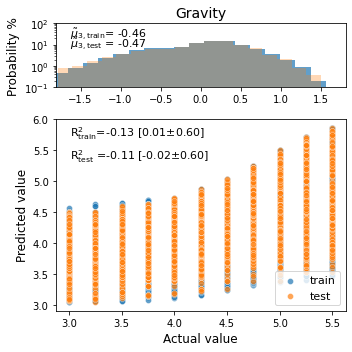

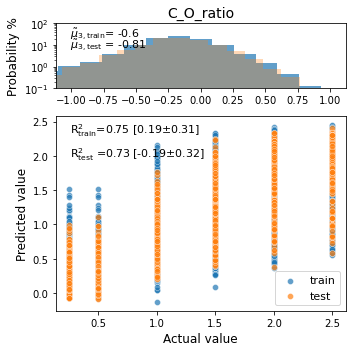

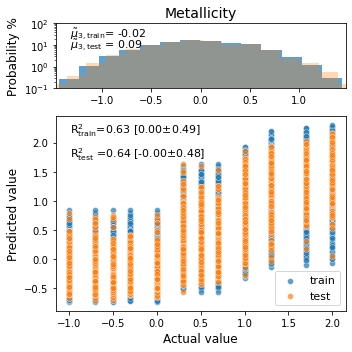

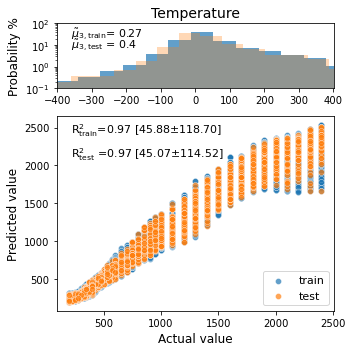

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )